# Analyzing and Predicting Hybrid and Non-Hybrid Vehicle Adoption in Ireland Using Data Mining Techniques.

In [ ]:
## 1. Load Dataset
import pandas as pd

file_path = r"C:\Users\mdsal\OneDrive\Desktop\DMA\Irish Vehicle Registrations (important for hybrid vehicle vs non-hybrid Vehicle). From CSO.csv"

df = pd.read_csv(file_path)

df.head()

,C02584V03137,Vehicle Category,C01841V02268,Type of Fuel,TLIST(M1),Month,STATISTIC,Statistic Label,UNIT,VALUE
0,-,All vehicle types,-,All fuel types,200601,2006M01,TDM01C1,All Vehicle Registrations,Number,61159
1,-,All vehicle types,-,All fuel types,200601,2006M01,TDM01C2,New Vehicle Registrations,Number,54217
2,-,All vehicle types,-,All fuel types,200601,2006M01,TDM01C3,Second Hand Vehicle Registrations,Number,6942
3,-,All vehicle types,-,All fuel types,200602,2006M02,TDM01C1,All Vehicle Registrations,Number,39883
4,-,All vehicle types,-,All fuel types,200602,2006M02,TDM01C2,New Vehicle Registrations,Number,32269


In [ ]:
df.columns

Index(['C02584V03137', 'Vehicle Category', 'C01841V02268', 'Type of Fuel',
       'TLIST(M1)', 'Month', 'STATISTIC', 'Statistic Label', 'UNIT', 'VALUE'],
      dtype='object')

In [ ]:
## 2. Data Cleaning & Preparation)
# Keep only useful columns
# Keep only required columns
df = df[['Vehicle Category', 'Type of Fuel', 'TLIST(M1)', 'Month', 'VALUE']]

# Remove 'All fuel types'
df = df[df['Type of Fuel'] != 'All fuel types']

# Create Hybrid vs Non-Hybrid label
df['Fuel_Group'] = df['Type of Fuel'].apply(
    lambda x: 'Hybrid' if x == 'Petrol and electric hybrid' else 'Non-Hybrid'
)

# Create Year and Month_Num
df['Year'] = df['TLIST(M1)'].astype(str).str[:4].astype(int)
df['Month_Num'] = df['Month'].str[-2:].astype(int)

df.head()

,Vehicle Category,Type of Fuel,TLIST(M1),Month,VALUE,Fuel_Group,Year,Month_Num
162,All vehicle types,Petrol,200601,2006M01,36501,Non-Hybrid,2006,1
163,All vehicle types,Petrol,200601,2006M01,32998,Non-Hybrid,2006,1
164,All vehicle types,Petrol,200601,2006M01,3503,Non-Hybrid,2006,1
165,All vehicle types,Petrol,200602,2006M02,23340,Non-Hybrid,2006,2
166,All vehicle types,Petrol,200602,2006M02,19395,Non-Hybrid,2006,2


In [ ]:
## create Hybrid vs Non-Hybrid label
# Hybrid → Petrol and electric hybrid
# Non-Hybrid → everything else
# Remove 'All fuel types'
df = df[df['Type of Fuel'] != 'All fuel types']

# Create Hybrid vs Non-Hybrid column
df['Fuel_Group'] = df['Type of Fuel'].apply(
    lambda x: 'Hybrid' if x == 'Petrol and electric hybrid' else 'Non-Hybrid'
)

# Check result
df[['Type of Fuel', 'Fuel_Group']].head()



,Type of Fuel,Fuel_Group
162,Petrol,Non-Hybrid
163,Petrol,Non-Hybrid
164,Petrol,Non-Hybrid
165,Petrol,Non-Hybrid
166,Petrol,Non-Hybrid


In [ ]:
df[df['Fuel_Group'] == 'Hybrid'].head(10)

,Vehicle Category,Type of Fuel,TLIST(M1),Month,VALUE,Fuel_Group
648,All vehicle types,Petrol and electric hybrid,200601,2006M01,104,Hybrid
649,All vehicle types,Petrol and electric hybrid,200601,2006M01,103,Hybrid
650,All vehicle types,Petrol and electric hybrid,200601,2006M01,1,Hybrid
651,All vehicle types,Petrol and electric hybrid,200602,2006M02,78,Hybrid
652,All vehicle types,Petrol and electric hybrid,200602,2006M02,77,Hybrid
653,All vehicle types,Petrol and electric hybrid,200602,2006M02,1,Hybrid
654,All vehicle types,Petrol and electric hybrid,200603,2006M03,78,Hybrid
655,All vehicle types,Petrol and electric hybrid,200603,2006M03,77,Hybrid
656,All vehicle types,Petrol and electric hybrid,200603,2006M03,1,Hybrid
657,All vehicle types,Petrol and electric hybrid,200604,2006M04,77,Hybrid


In [ ]:
df['Fuel_Group'].value_counts()

Fuel_Group
Non-Hybrid    3888
Hybrid         972
Name: count, dtype: int64

In [ ]:
df['Type of Fuel'].unique()

array(['Petrol', 'Diesel', 'Other fuel types',
       'Petrol and electric hybrid', 'Ethanol and petrol'], dtype=object)

In [ ]:
# Extract Year from TLIST(M1)
df['Year'] = df['TLIST(M1)'].astype(str).str[:4].astype(int)

# Extract Month number from Month column (e.g. 2006M01 -> 1)
df['Month_Num'] = df['Month'].str[-2:].astype(int)

# Check the result
df[['TLIST(M1)', 'Month', 'Year', 'Month_Num']].head()

,TLIST(M1),Month,Year,Month_Num
162,200601,2006M01,2006,1
163,200601,2006M01,2006,1
164,200601,2006M01,2006,1
165,200602,2006M02,2006,2
166,200602,2006M02,2006,2


In [ ]:
# Aggregate monthly totals by Fuel Group
monthly_df = (
    df.groupby(['Year', 'Month_Num', 'Fuel_Group'])['VALUE']
      .sum()
      .reset_index()
)

monthly_df.head()

,Year,Month_Num,Fuel_Group,VALUE
0,2006,1,Hybrid,416
1,2006,1,Non-Hybrid,244220
2,2006,2,Hybrid,312
3,2006,2,Non-Hybrid,159220
4,2006,3,Hybrid,312


In [ ]:
## 3. EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid")

In [ ]:
## EDA-1
print("Years covered:", monthly_df['Year'].min(), "-", monthly_df['Year'].max())
print("Fuel groups:", monthly_df['Fuel_Group'].unique())
print("Total records:", monthly_df.shape[0])

Years covered: 2006 - 2010
Fuel groups: ['Hybrid' 'Non-Hybrid']
Total records: 108


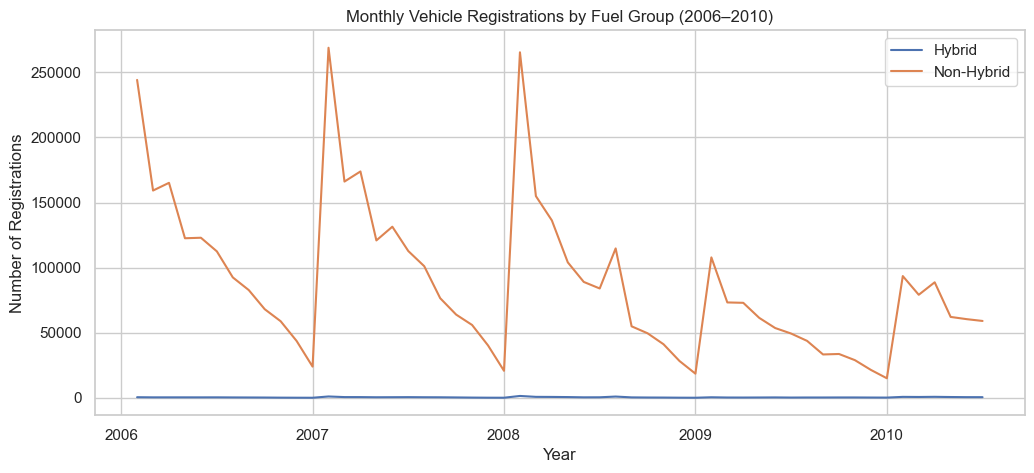

In [ ]:
## EDA-2 MONTHLY TREND (LINE CHART)
plt.figure(figsize=(12,5))

for fuel in monthly_df['Fuel_Group'].unique():
    subset = monthly_df[monthly_df['Fuel_Group'] == fuel]
    plt.plot(
        subset['Year'] + subset['Month_Num']/12,
        subset['VALUE'],
        label=fuel
    )

plt.title("Monthly Vehicle Registrations by Fuel Group (2006–2010)")
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.legend()
plt.grid(True)

plt.show()

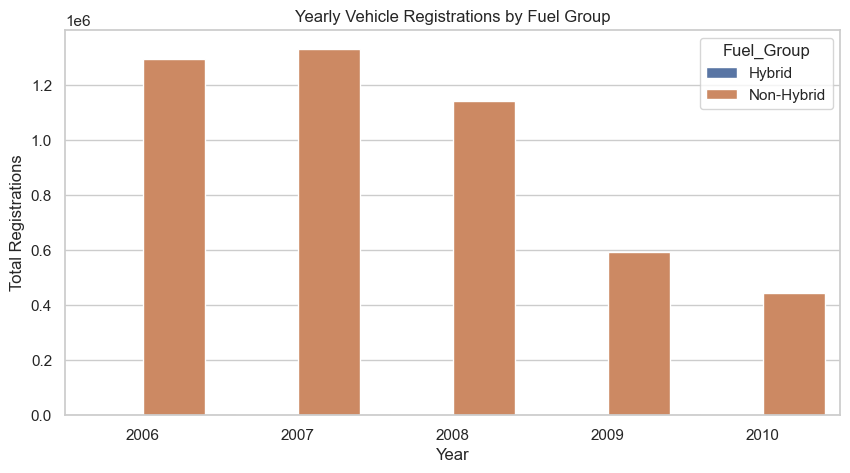

In [ ]:
## EDA-3 YEARLY TOTALS (BAR CHART)
yearly_totals = (
    monthly_df.groupby(['Year', 'Fuel_Group'])['VALUE']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=yearly_totals,
    x='Year',
    y='VALUE',
    hue='Fuel_Group'
)

plt.title("Yearly Vehicle Registrations by Fuel Group")
plt.ylabel("Total Registrations")
plt.xlabel("Year")
plt.show()


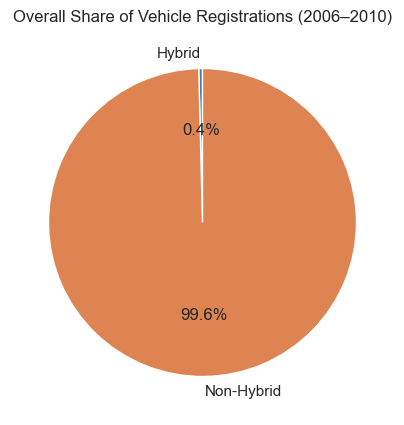

In [ ]:
## EDA 4 — PIE CHART (FUEL SHARE)
fuel_share = monthly_df.groupby('Fuel_Group')['VALUE'].sum()

plt.figure(figsize=(5,5))
fuel_share.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Overall Share of Vehicle Registrations (2006–2010)")
plt.ylabel("")
plt.show()

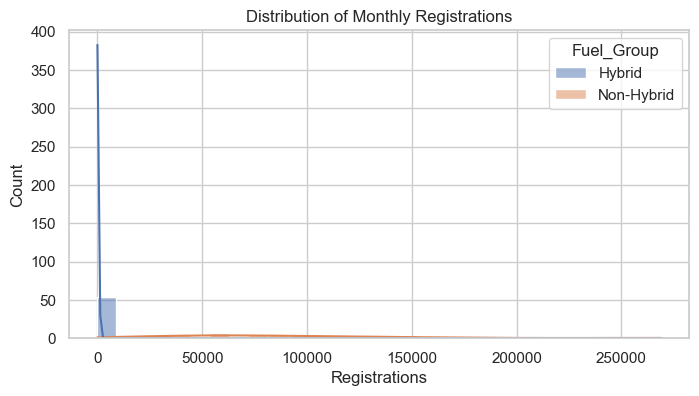

In [ ]:
## EDA 5 — DISTRIBUTION (HISTOGRAM)
plt.figure(figsize=(8,4))
sns.histplot(
    data=monthly_df,
    x='VALUE',
    hue='Fuel_Group',
    bins=30,
    kde=True
)

plt.title("Distribution of Monthly Registrations")
plt.xlabel("Registrations")
plt.show()

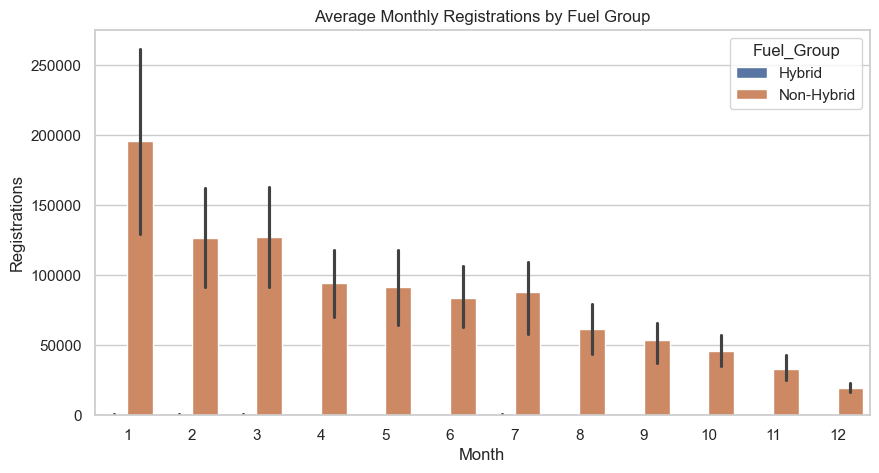

In [ ]:
## EDA 6 — SEASONALITY (MONTH-WISE)
plt.figure(figsize=(10,5))
sns.barplot(
    data=monthly_df,
    x='Month_Num',
    y='VALUE',
    hue='Fuel_Group'
)

plt.title("Average Monthly Registrations by Fuel Group")
plt.xlabel("Month")
plt.ylabel("Registrations")
plt.show()

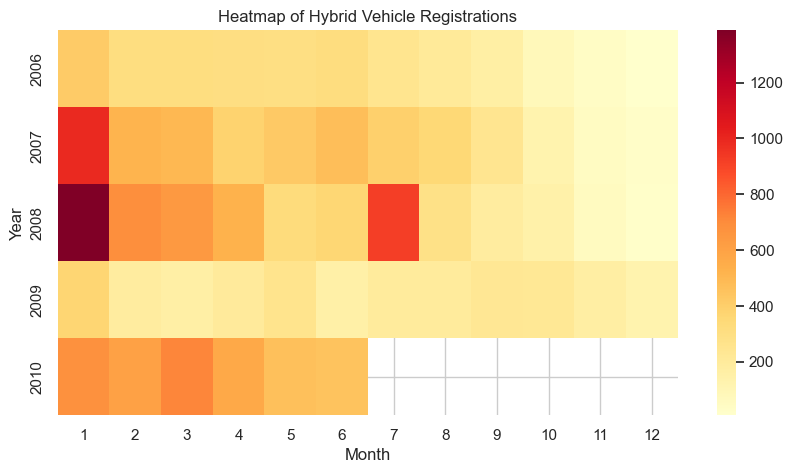

In [ ]:
## EDA 7 — HEATMAP (ADVANCED, HIGH MARKS)
heatmap_data = (
    monthly_df[monthly_df['Fuel_Group'] == 'Hybrid']
    .pivot_table(
        index='Year',
        columns='Month_Num',
        values='VALUE',
        aggfunc='mean'
    )
)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, cmap="YlOrRd")

plt.title("Heatmap of Hybrid Vehicle Registrations")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

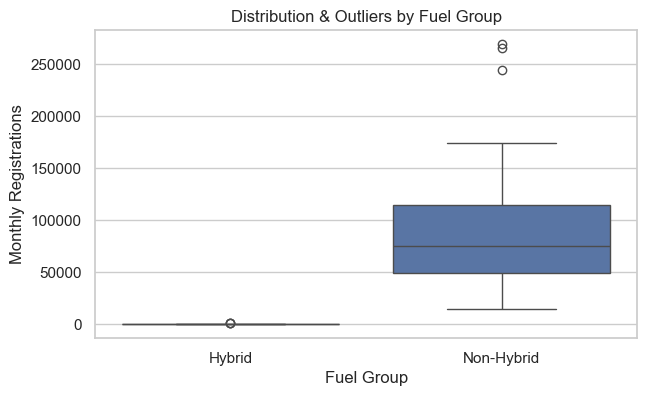

In [ ]:
## EDA 8 — BOXPLOT (Outliers & Spread)
plt.figure(figsize=(7,4))
sns.boxplot(
    data=monthly_df,
    x='Fuel_Group',
    y='VALUE'
)

plt.title("Distribution & Outliers by Fuel Group")
plt.ylabel("Monthly Registrations")
plt.xlabel("Fuel Group")
plt.show()

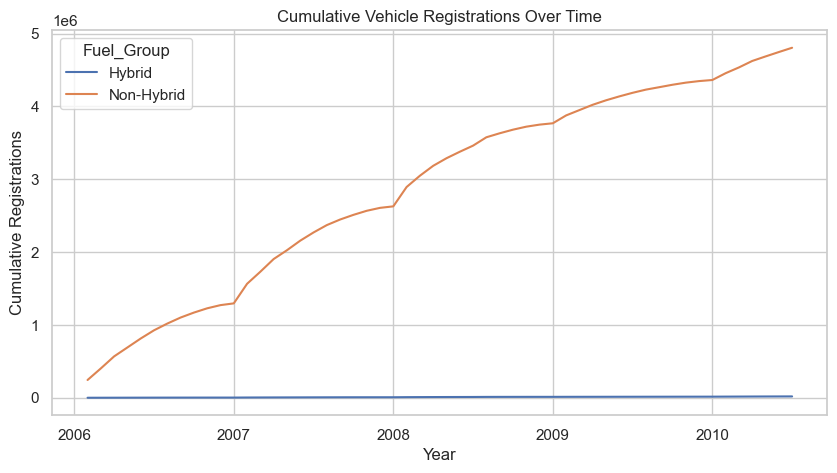

In [ ]:
## EDA 9 — CUMULATIVE GROWTH (LINE CHART)
cumulative_df = monthly_df.sort_values(['Year', 'Month_Num'])
cumulative_df['Cumulative_Value'] = (
    cumulative_df.groupby('Fuel_Group')['VALUE'].cumsum()
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=cumulative_df,
    x=cumulative_df['Year'] + cumulative_df['Month_Num']/12,
    y='Cumulative_Value',
    hue='Fuel_Group'
)

plt.title("Cumulative Vehicle Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Cumulative Registrations")
plt.show()

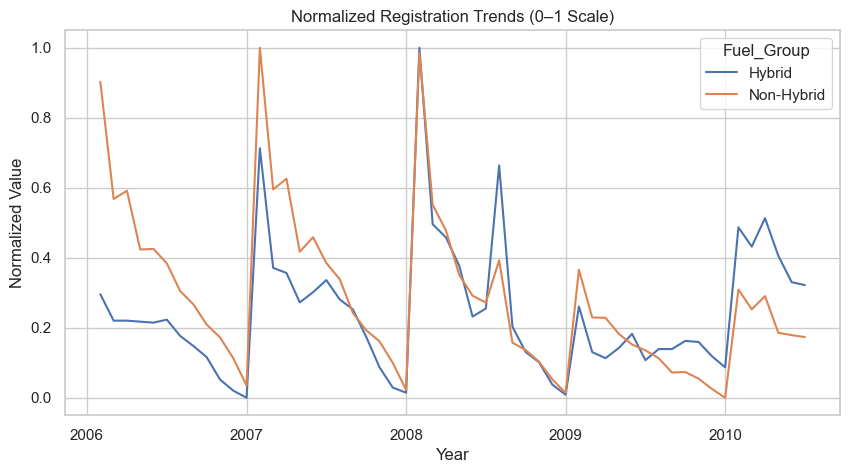

In [ ]:
## EDA 10 — NORMALIZED TREND (FAIR COMPARISON)
normalized_df = monthly_df.copy()

normalized_df['Normalized_Value'] = (
    normalized_df.groupby('Fuel_Group')['VALUE']
    .transform(lambda x: (x - x.min()) / (x.max() - x.min()))
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=normalized_df,
    x=normalized_df['Year'] + normalized_df['Month_Num']/12,
    y='Normalized_Value',
    hue='Fuel_Group'
)

plt.title("Normalized Registration Trends (0–1 Scale)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.show()

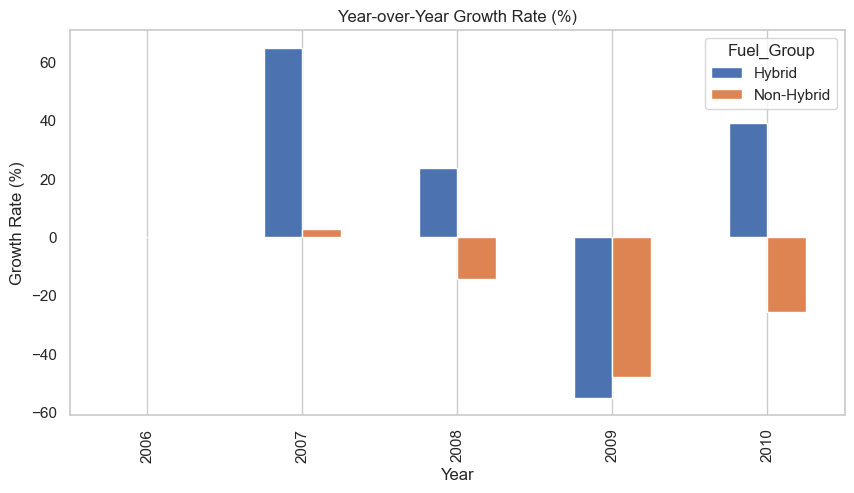

In [ ]:
## EDA 11 — YEAR-OVER-YEAR CHANGE (BAR CHART)
yearly_pivot = yearly_totals.pivot(
    index='Year',
    columns='Fuel_Group',
    values='VALUE'
)

yoy_change = yearly_pivot.pct_change() * 100

plt.figure(figsize=(10,5))
yoy_change.plot(kind='bar', ax=plt.gca())

plt.title("Year-over-Year Growth Rate (%)")
plt.ylabel("Growth Rate (%)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.show()

In [ ]:
## 4. Data Mining Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Encode Fuel_Group
monthly_df['Fuel_Binary'] = monthly_df['Fuel_Group'].map({
    'Non-Hybrid': 0,
    'Hybrid': 1
})

# Features and target
X = monthly_df[['Year', 'Month_Num', 'Fuel_Binary']]
y = monthly_df['VALUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

rmse, mae


(np.float64(26499.31048257926), 22475.884675528006)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Select Hybrid data only
hybrid_ts = monthly_df[monthly_df['Fuel_Group'] == 'Hybrid'] \
    .sort_values('Date')

# Set Date as index
hybrid_ts = hybrid_ts.set_index('Date')['VALUE']

hybrid_ts.head()

Date
2006-01-01    416
2006-02-01    312
2006-03-01    312
2006-04-01    308
2006-05-01    304
Name: VALUE, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split time series into train and test (80% train, 20% test)
train_size = int(len(hybrid_ts) * 0.8)
train_ts = hybrid_ts[:train_size]
test_ts = hybrid_ts[train_size:]

# Train ARIMA model
arima_model = ARIMA(train_ts, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast for test period
forecast = arima_result.forecast(steps=len(test_ts))

# Evaluation
rmse_arima = np.sqrt(mean_squared_error(test_ts, forecast))
mae_arima = mean_absolute_error(test_ts, forecast)

rmse_arima, mae_arima

C:\Users\mdsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mdsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mdsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(np.float64(218.23168302817817), 194.35838247456977)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Features and target
X = monthly_df[['Year', 'Month_Num', 'Fuel_Binary']]
y = monthly_df['VALUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)

rmse_dt, mae_dt

(np.float64(6675.291808398546), 3587.818181818182)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Features and target
X = monthly_df[['Year', 'Month_Num', 'Fuel_Binary']]
y = monthly_df['VALUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

rmse_rf, mae_rf

(np.float64(6831.846309517856), 3897.714545454546)

In [ ]:
## 5. Model Evaluation
import pandas as pd

# Create model comparison table
results_df = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'ARIMA (Hybrid Only)',
        'Decision Tree',
        'Random Forest'
    ],
    'RMSE': [
        rmse,
        rmse_arima,
        rmse_dt,
        rmse_rf
    ],
    'MAE': [
        mae,
        mae_arima,
        mae_dt,
        mae_rf
    ]
})

results_df


,Model,RMSE,MAE
0,Linear Regression,26499.310483,22475.884676
1,ARIMA (Hybrid Only),218.231683,194.358382
2,Decision Tree,6675.291808,3587.818182
3,Random Forest,6831.846310,3897.714545
